# Prepare logbook

import statement necessary to get the logbook up and running

In [ ]:
from IPython.html import widgets
from IPython.display import display
from IPython.html.widgets import interact

In [49]:
import os, os.path

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [54]:
from skimage import exposure
import skimage

## Select the working folder

For this analysis, the sequence of runs that belongs to each sample have been placed in 3 different folders 
(Sample1, Sample2 and Sample3). 

--> **First you will need to select the sample you want to work with.**

In [424]:
w = widgets.Dropdown(options = ['Sample1','Sample2','Sample3'], 
                     value='Sample1', 
                     description='Choose your sample folder')
display(w)

In [425]:
data_folder = w.value
list_of_files = [name for name in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, name))]
number_of_files = len(list_of_files)

## Working on Sample selected

--> **Select the slide you want to work on**

Ideally, you will pick a slide that does not contain the object to isolate. You will then have the option to select a range of pixels to remove. those pixels will be removed from all the slides.



8140


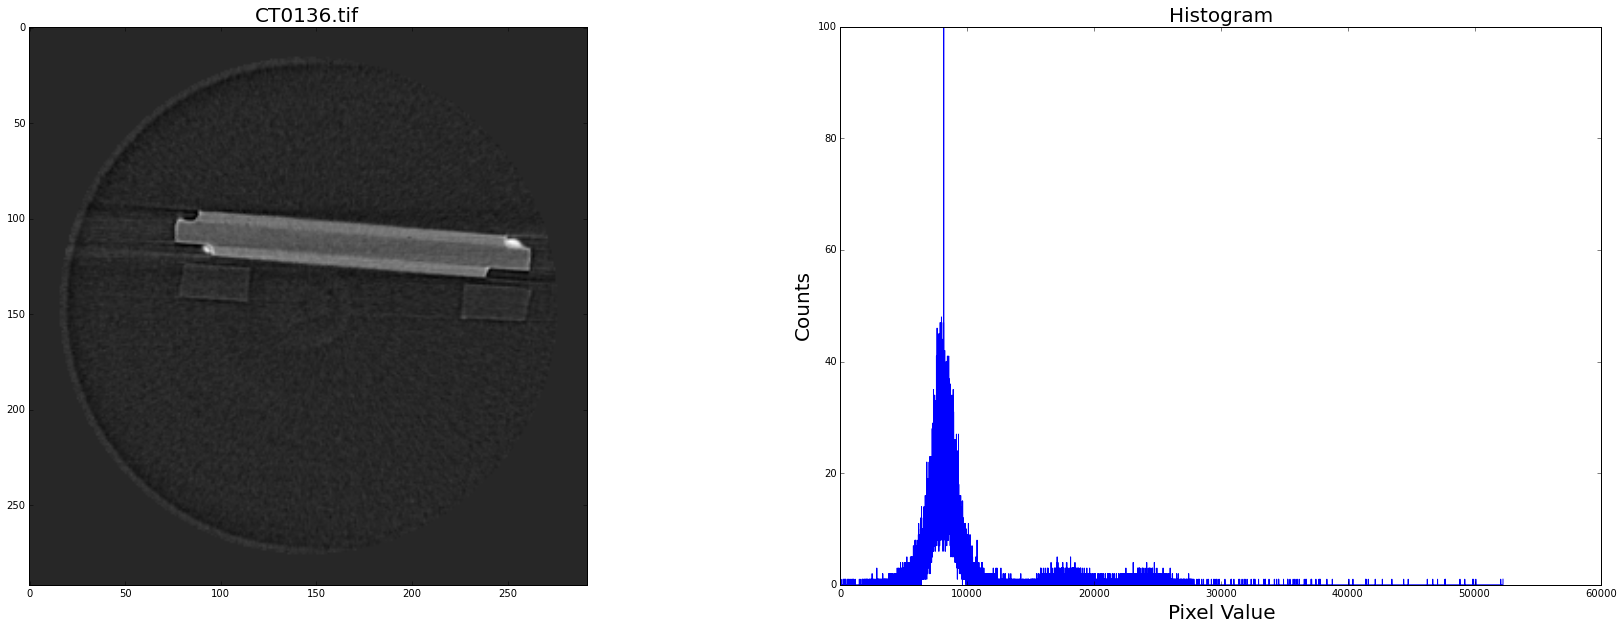

In [384]:
def plot_image(n):
    image = mpimg.imread(os.path.join(data_folder, list_of_files[n]))
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
    ax_img, ax_hist = axes
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_title(list_of_files[n], fontsize=20)
     
    histo = skimage.exposure.histogram(image, nbins=256)
    ax_hist.plot(histo[1], histo[0])
#    ax_hist.set_xlim(8000, 10000)
    ax_hist.set_ylim(0, 100)
    ax_hist.set_title('Histogram', fontsize=20)
    ax_hist.set_xlabel('Pixel Value', fontsize=20)
    ax_hist.set_ylabel('Counts', fontsize=20)
    
    #calculate intensity corresponding to max Counts
    index_max_counts = histo[0].argmax(axis=0)
    max_intensity = histo[1][index_max_counts]
    
    f = open('config/config_file.txt','w')
    f.write("index_image : %s\n" %n)
    f.write("max_x_axis : %d\n" %(histo[1][-1]))
    f.write("max_y_axis : %d\n" %(max(histo[0])))
    f.write("max_intensity: %d" %(max_intensity))
    f.close()
    
#    plt.title(list_of_files[n])
#    plt.show()

interact(plot_image, n=(0, number_of_files-1, 1))

## Recovering parameters from selected slide

In [426]:
# recovering parameters saved in the config_file.txt
f = open('config/config_file.txt', 'r')
array_file = []
array_file = f.read()
line_split = array_file.split('\n')
dict_variable = {}
for line in line_split:
    _line = line.split(':')
    _name = _line[0].strip()
    _value = _line[1].strip()
    dict_variable[_name] = _value

f.close()
#print(dict_variable['max_x_axis'])    # to retrieve values from config_file.txt

In [427]:
# retrieve values from config_file.txt
xmax = int(dict_variable['max_x_axis'])
ymax = int(dict_variable['max_y_axis'])
index = int(dict_variable['index_image'])
max_intensity = int(dict_variable['max_intensity'])

# Start Analysis of peaks

## Remove or Keep 

** -> Do you want to remove the range you gonna select, or keep it ?**

In [428]:
# do you want to keep the selection of remove the selection
w = widgets.Dropdown(options = ['Keep Range Selected','Remove Range Selected'], 
                     value='Remove Range Selected', 
                     description='Choose the type of operation you want to perform')
display(w)

## Visualize histogram we are going to work on.

You gonna have the option to change the range displayed. This way you will be able to optimize your fitting curve.

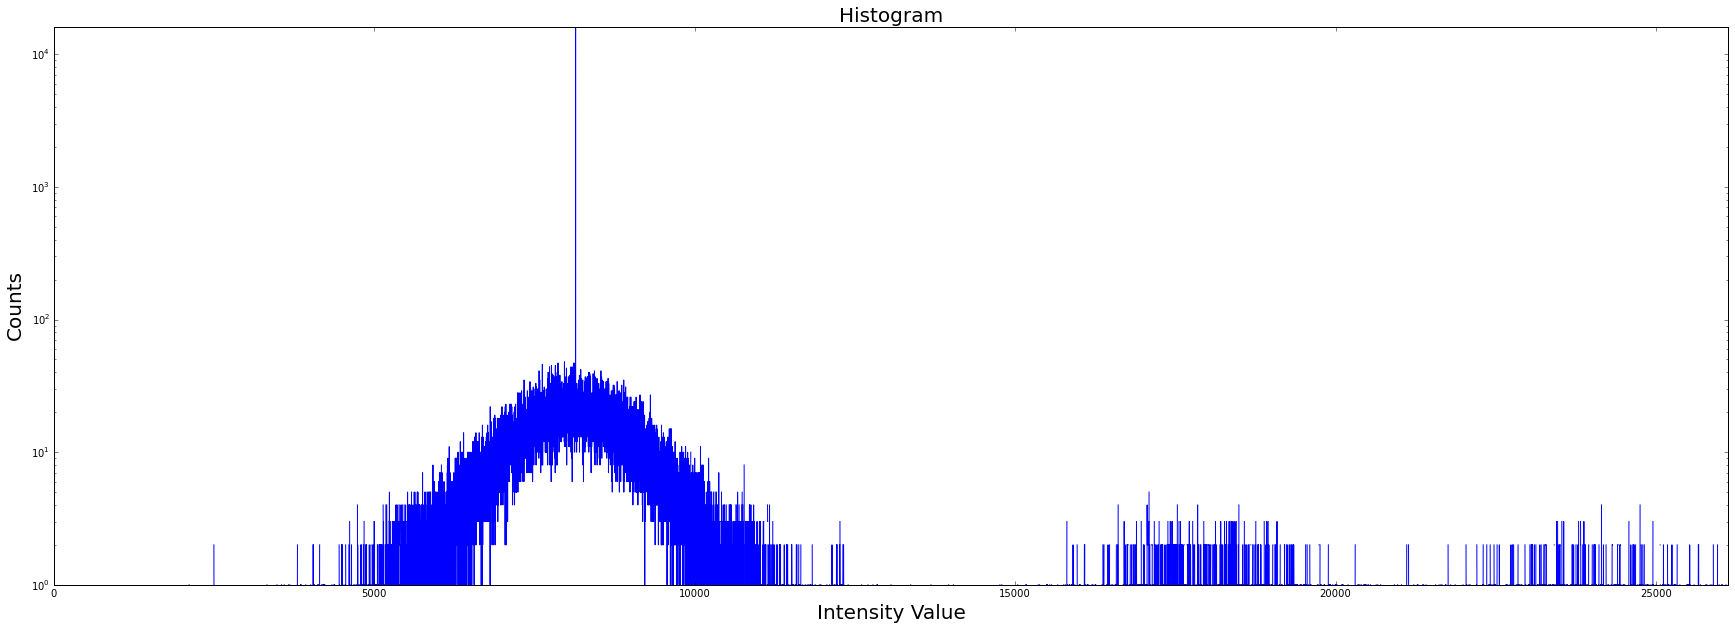

In [429]:
def plot_histo(xmax_value, ymax_value, ylog):
    image = mpimg.imread(os.path.join(data_folder, list_of_files[index]))
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30,10))
    ax_hist = axes
    histo = skimage.exposure.histogram(image, nbins=256)

    if ylog:
        ax_hist.semilogy(histo[1], histo[0])
    else:
        ax_hist.plot(histo[1], histo[0])
    ax_hist.set_xlim(0, xmax_value)
    ax_hist.set_ylim(0, ymax_value)
    
    ax_hist.set_title('Histogram', fontsize=20)
    ax_hist.set_xlabel('Intensity Value', fontsize=20)
    ax_hist.set_ylabel('Counts', fontsize=20)
    
    f = open('config/user_config_file.txt','w')
    f.write("user_xmax_value : %d\n" %xmax_value)
    f.write("user_ymax_value : %d\n" %ymax_value)
    f.write("user_ylog: %s" %ylog)
    f.close()
    
# display histogram of data to work with with possibilities to scale the axis
interact(plot_histo, xmax_value=(0, xmax, 1), 
         ymax_value=(0, ymax, 1), 
         ylog=widgets.CheckboxWidget(value=True, description='Log y-axis'))


# Remove or not Particular pixels according to their intensity

We gonna give you the option to remove a given *intensity* value (max counts found or other).

In [431]:
# maybe remove the pixels with the max counts !
w = widgets.CheckboxWidget(value=True, description='Do you want to remove a particular Intensity value?')
display(w)

In [432]:
if w.value:
    descrption1 = "Remove max Intensity (value is : %s)" %max_intensity
    w1 = widgets.CheckboxWidget(value=True, description=descrption1)
    display(w1)
    w2 = widgets.Text(value='', description='or ->    Intensity value to remove:')
    display(w2)

In [433]:
# recovering parameters saved in the config_file.txt
f = open('config/user_config_file.txt', 'r')
array_file = []
array_file = f.read()
line_split = array_file.split('\n')
dict_variable = {}
for line in line_split:
    _line = line.split(':')
    _name = _line[0].strip()
    _value = _line[1].strip()
    dict_variable[_name] = _value
f.close()

# retrieve values from config_file.txt
user_xmax_value = int(dict_variable['user_xmax_value'])
user_ymax_value = int(dict_variable['user_ymax_value'])
user_ylog = bool(dict_variable['user_ylog'])

Working with file: CT0136.tif


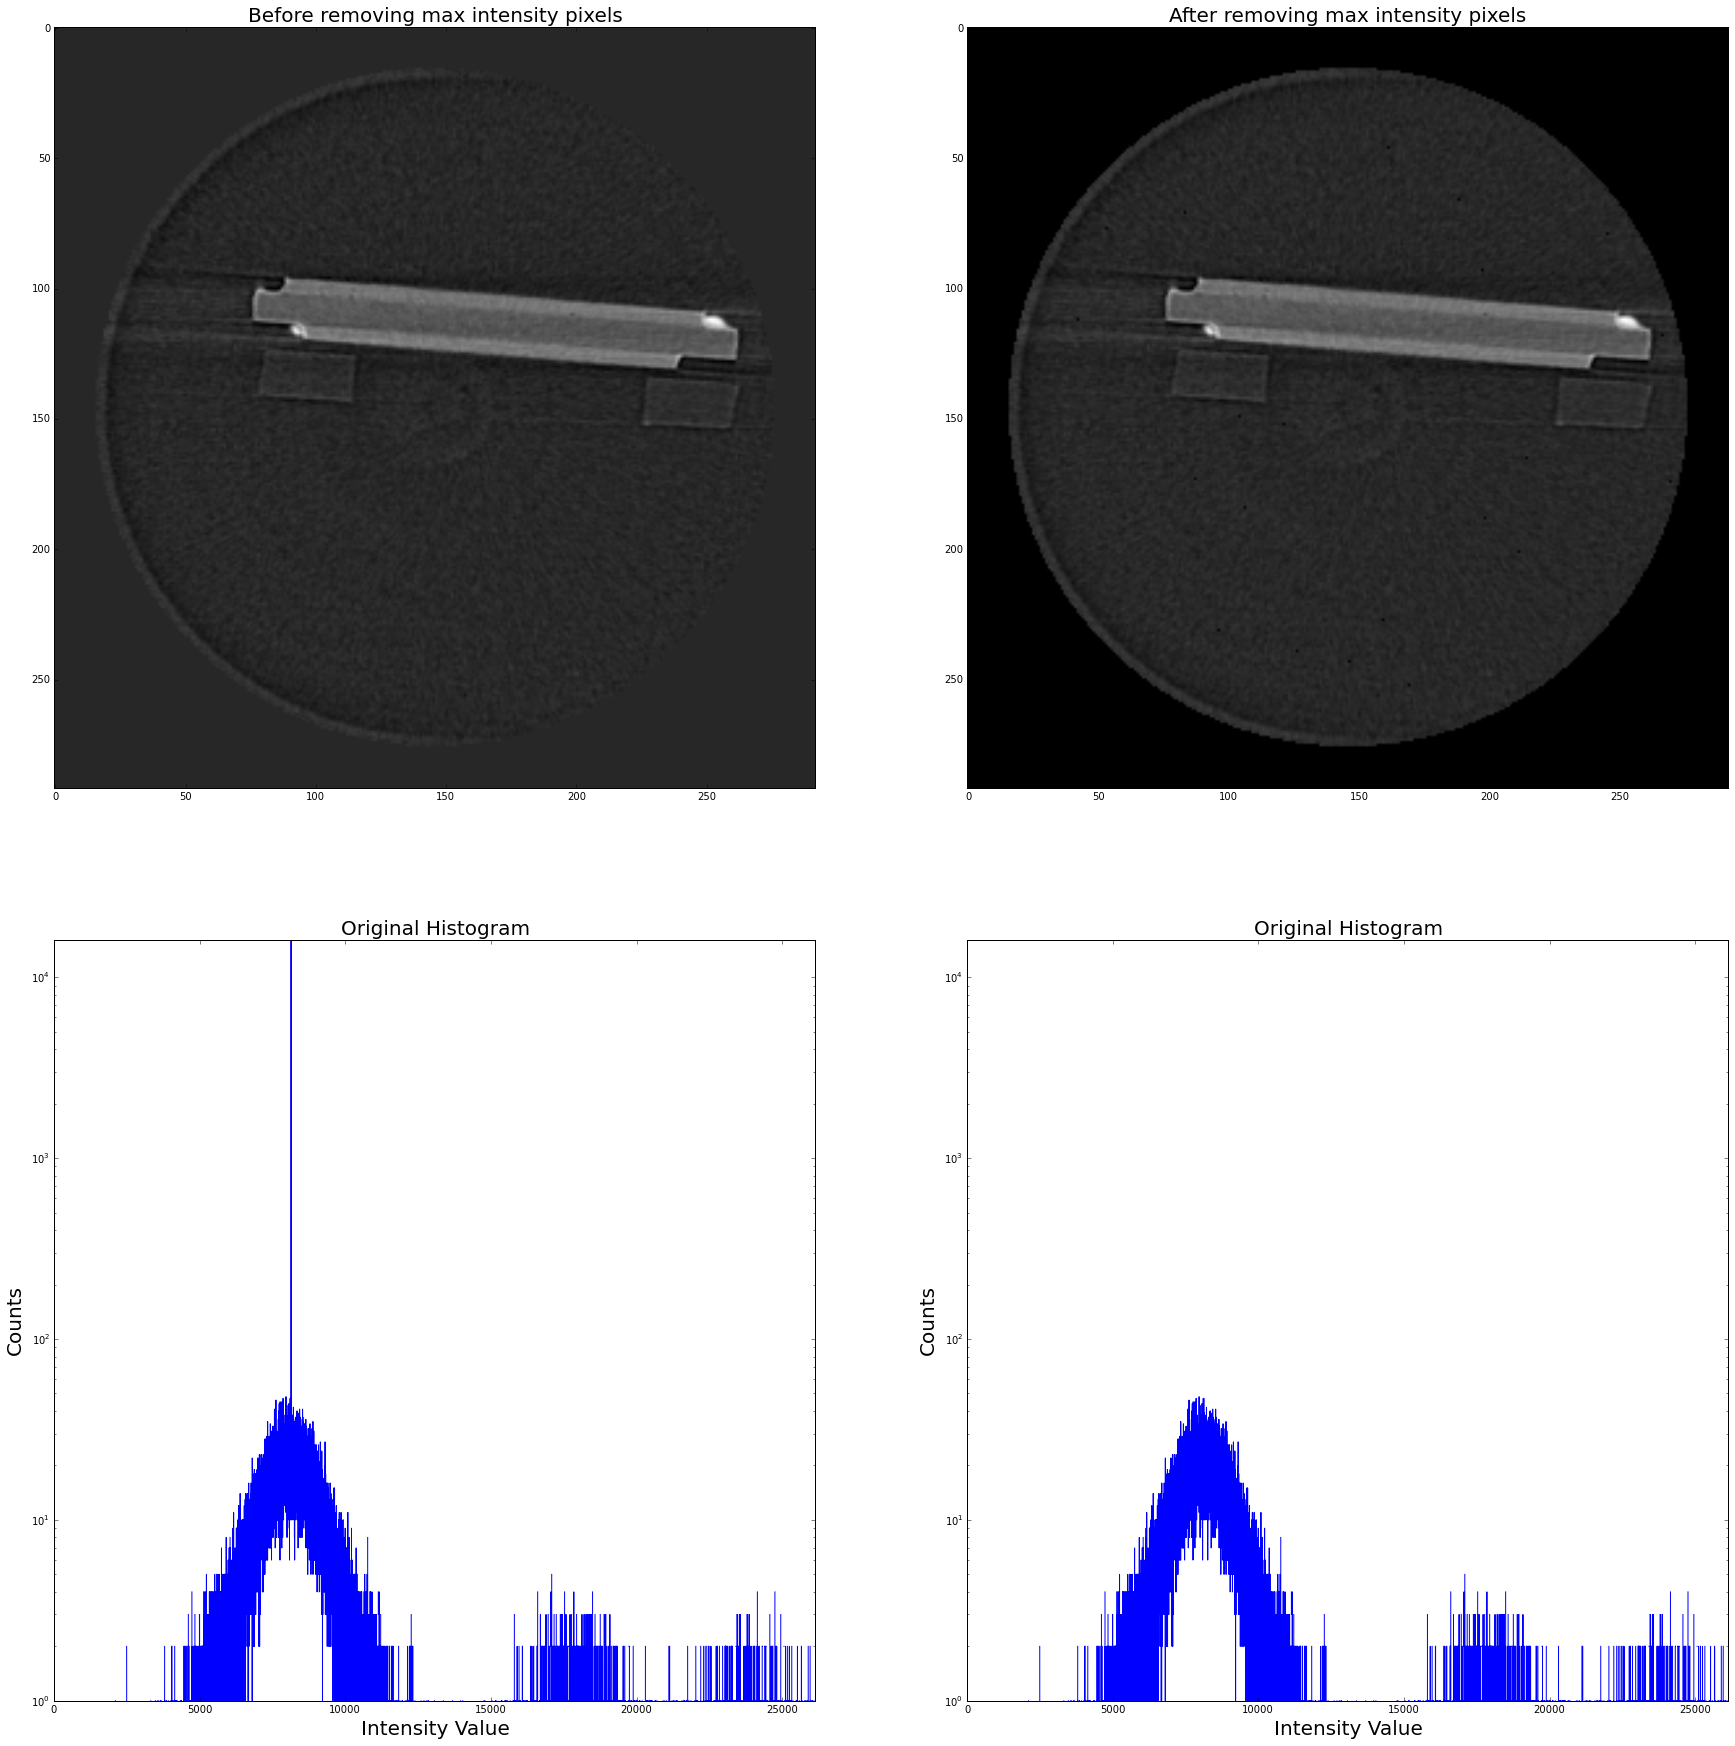

In [434]:
image_before = mpimg.imread(os.path.join(data_folder, list_of_files[index]))
print('Working with file: %s' %list_of_files[index])
if w.value and w1.value:
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30,30))
    top, bottom = axes

    ax_img_before, ax_img_after = top
    ax_hist_before, ax_hist_after = bottom

    ax_img_before.imshow(image_before, cmap=plt.cm.gray)
    ax_img_before.set_title('Before removing max intensity pixels', fontsize=20)

    index_to_remove = (image_before == max_intensity)
    image_after = image_before.copy()
    image_after[index_to_remove] = 0
    
    ax_img_after.imshow(image_after, cmap=plt.cm.gray)
    ax_img_after.set_title("After removing max intensity pixels", fontsize=20)
    
    histo_before = skimage.exposure.histogram(image_before, nbins=256)
    if user_ylog:
        ax_hist_before.semilogy(histo_before[1], histo_before[0])
    else:
        ax_hist_before.plot(histo[1], histo[0])
    ax_hist_before.set_xlim(0, user_xmax_value)
    ax_hist_before.set_ylim(0, user_ymax_value)
    
    ax_hist_before.set_title('Original Histogram', fontsize=20)
    ax_hist_before.set_xlabel('Intensity Value', fontsize=20)
    ax_hist_before.set_ylabel('Counts', fontsize=20)

    histo_after = skimage.exposure.histogram(image_after, nbins=256)
    if user_ylog:
        ax_hist_after.semilogy(histo_after[1], histo_after[0])
    else:
        ax_hist_after.plot(histo_after[1], histo[0])
    ax_hist_after.set_xlim(0, user_xmax_value)
    ax_hist_after.set_ylim(0, user_ymax_value)
    
    ax_hist_after.set_title('Original Histogram', fontsize=20)
    ax_hist_after.set_xlabel('Intensity Value', fontsize=20)
    ax_hist_after.set_ylabel('Counts', fontsize=20)
    
   

## Work on fitting of data

In [416]:
import math
def gaussian(a, b, c, range_x):
    ''' a is the height
        b is the position of the center
        c controls the width of the bell
        https://en.wikipedia.org/wiki/Gaussian_function
    '''
    result = []
    for value in range_x:
        result.append(a*math.exp(-((value-b)**2)/(2*c**2)))
    return result

def lorentzian(a, b, c, range_x):
    ''' a is the height
        b is the position of the center
        c is the width of the peak
        http://mathworld.wolfram.com/LorentzianFunction.html
    '''
    result = []
    for value in range_x:
        _value = a*(1/np.pi)*(c/2)/((value-b)**2+(c/2)**2)
        result.append(_value)
    return result

def normal(a, b, range_x):
    '''
    a is the height
    b is the center (mu)
    c is the standard deviation (sigma)
    https://en.wikipedia.org/wiki/Normal_distribution
    '''
    result = []
    for value in range_x:
        _value = a*math.exp(-(((value - b)**2)/(2*c**2)))/(c*math.sqrt(2*math.pi))

In [415]:
# make user select the fitting curve of choice
w_fit = widgets.Dropdown(options = ['Gaussian','Lorentzian','Normal'], 
                     value='Gaussian', 
                     description='Fit Data With ?')
display(w_fit)

Working with Gaussian


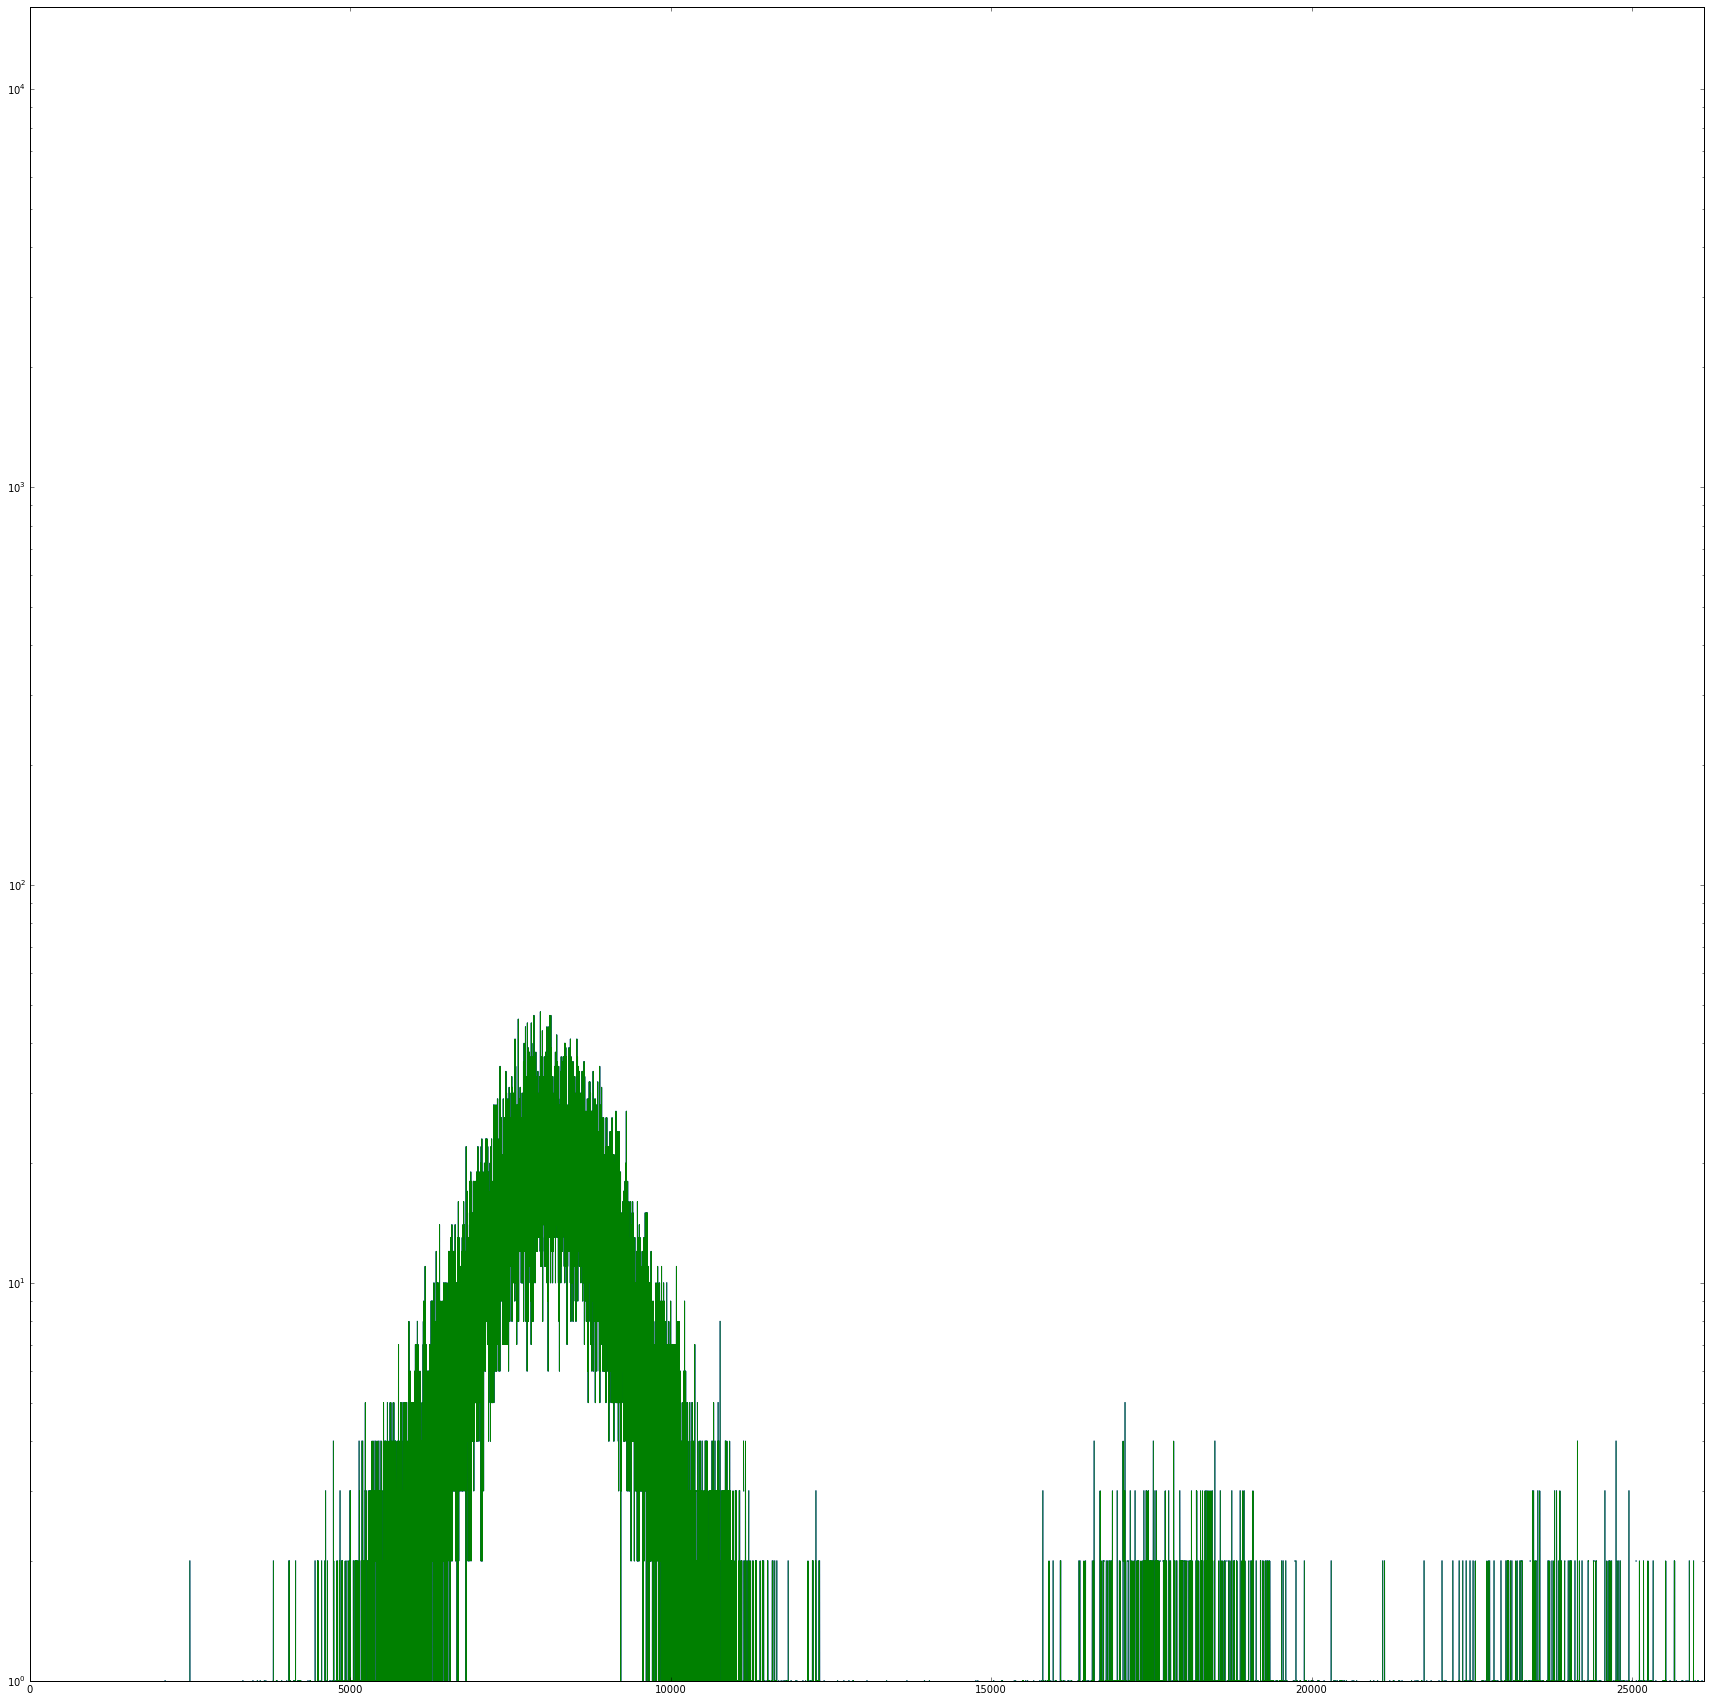

In [435]:
if w_fit.value == 'Gaussian':
    print('Working with Gaussian')
elif w_fit.value == 'Lorentzian':
    print('Working with Lorentzian')
else:
    print('Working with Normal distribution')
    
fig = plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,30))
ax.plot(histo_after[1], histo_after[0])
ax.set_xlim(1, user_xmax_value)
ax.set_ylim(1, user_ymax_value)
ax.semilogy(histo_after[1], histo_after[0])





In [134]:
# allow selection of min and max lines to remove pixel from this region

In [135]:
# validate to perform pixel remove over all other images and provide slider to go other all those images, plot 
# histogram on the side with fitted curve previously selected

In [136]:
# give option to export all images into format of choice

In [288]:
a=[1,2,3,4,5,6,7,8,9,0]
print(a.index(max(a)))

8


In [404]:
math.pi

3.141592653589793

In [406]:
math.exp(2.18)

8.846306258720883